In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import numpy as np

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("clean_data.csv")

In [4]:
df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   float64
 1   is_female           1337 non-null   int64  
 2   bmi                 1337 non-null   float64
 3   children            1337 non-null   float64
 4   is_smoker           1337 non-null   int64  
 5   charges             1337 non-null   int64  
 6   region_southeast    1337 non-null   int64  
 7   bmi_category_Obese  1337 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 83.7 KB


In [5]:
X=df.drop(columns=["charges"], axis=1)
y=df["charges"]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   float64
 1   is_female           1337 non-null   int64  
 2   bmi                 1337 non-null   float64
 3   children            1337 non-null   float64
 4   is_smoker           1337 non-null   int64  
 5   region_southeast    1337 non-null   int64  
 6   bmi_category_Obese  1337 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 73.2 KB


In [7]:
y.info()


<class 'pandas.core.series.Series'>
RangeIndex: 1337 entries, 0 to 1336
Series name: charges
Non-Null Count  Dtype
--------------  -----
1337 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


In [8]:
print(len(X), len(y))  # Dono same hone chahiye

1337 1337


Step 1: Split the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled

array([[-1.1576804 , -0.97140947, -0.99651264, ..., -0.50029231,
        -0.60581158, -1.03523206],
       [-1.30061876, -0.97140947, -0.83173739, ..., -0.50029231,
        -0.60581158, -1.03523206],
       [ 0.91492586,  1.029432  ,  1.14556565, ..., -0.50029231,
        -0.60581158,  0.96596699],
       ...,
       [-1.37208794, -0.97140947, -1.32606315, ..., -0.50029231,
        -0.60581158, -1.03523206],
       [-0.08564268,  1.029432  , -0.33741163, ..., -0.50029231,
        -0.60581158, -1.03523206],
       [-0.30005022,  1.029432  ,  0.81601515, ..., -0.50029231,
         1.65067825,  0.96596699]], shape=(1069, 7))

In [12]:
X_test_scaled

array([[ 0.70051832, -0.97140947, -1.32606315, ..., -0.50029231,
        -0.60581158, -1.03523206],
       [-0.72886531,  1.029432  , -0.83173739, ..., -0.50029231,
        -0.60581158, -1.03523206],
       [ 0.84345668,  1.029432  ,  0.9807904 , ..., -0.50029231,
        -0.60581158,  0.96596699],
       ...,
       [-1.22914958,  1.029432  ,  0.65123989, ..., -0.50029231,
        -0.60581158,  0.96596699],
       [ 1.5581485 , -0.97140947,  0.9807904 , ...,  1.99883143,
        -0.60581158,  0.96596699],
       [ 0.55757996,  1.029432  , -0.99651264, ..., -0.50029231,
        -0.60581158, -1.03523206]], shape=(268, 7))

In [13]:
model=KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
y_pred=model.predict(X_test_scaled)


In [15]:
y_pred

array([ 7968.6, 11901.2, 10853.2, 39091.2,  5320.2, 11042. , 43930.2,
        2472.2,  8280.4,  9518.8, 16890.2, 25029. , 41449.2, 11700. ,
        9006.8, 12677.6,  2840.6, 38980.6,  7574.4,  4839.2,  3724.4,
       21212.6,  9948.8, 21045.6, 37092.8, 12862.6, 43115.4, 42716. ,
        9918.6, 10154.2,  3715. ,  7985. ,  3697.6, 16112.8, 44670.6,
       13596.8, 14722.8,  6233.6, 22372. ,  6967.4,  2296.2, 20609.4,
       44420.8,  9661. ,  7823.2,  3333. ,  2290.2,  7775.6,  8451.2,
        9951.6,  4158.6,  6339.6, 22445. ,  4395.4,  7292.8, 11276.4,
        9465.2,  7862.2, 37813. ,  7948.8, 19198.6,  5661.4, 14484.2,
        1665.8, 11581.2, 10121.8,  6487.8, 23830.4, 20579.4, 12151.8,
       11159. ,  6079.4,  6417.8,  3132.8, 10982.4,  2460.4, 13285.6,
        9007.6, 14294.8, 12265.8,  7378.8, 13601.8, 14865.8, 10489.4,
       26375.8,  9056. ,  2630.4,  2310.4,  4050. ,  4939.6, 11480.2,
       19068.6,  7410.6,  1822.6,  2106.6, 42716. , 11079.8,  6967.4,
        4395.4, 1282

In [16]:
y_test

899      8688
1063     5708
1255    11436
298     38746
237      4463
        ...  
534     13831
542     13887
759      3925
1283    47403
1284     8534
Name: charges, Length: 268, dtype: int64

isme accuracy score regression me nhi chlta h >>sirf classification ke liye hota hai —


In [17]:
r2=r2_score(y_test, y_pred)

In [18]:
r2

0.876620646459099

In [19]:
n=X_test.shape[0]
p=X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("adjusted r2 score",adjusted_r2)

adjusted r2 score 0.8732988946329978


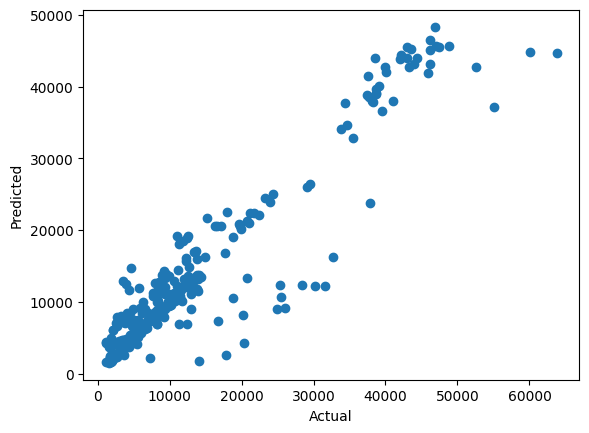

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

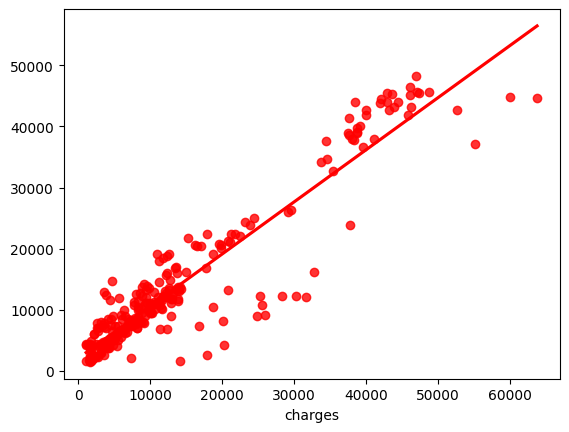

In [ ]:

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
899,8688,7968.6,719.4
1063,5708,11901.2,-6193.2
1255,11436,10853.2,582.8
298,38746,39091.2,-345.2
237,4463,5320.2,-857.2
...,...,...,...
534,13831,11791.6,2039.4
542,13887,13312.4,574.6
759,3925,12475.8,-8550.8
1283,47403,45443.8,1959.2


In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [25]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 16383.9317
- Mean Absolute Error: 14817.7755
- R2 Score: -0.9606
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15459.5664
- Mean Absolute Error: 14053.1812
- R2 Score: -0.3006


Lasso
Model performance for Training set
- Root Mean Squared Error: 16375.8137
- Mean Absolute Error: 14809.2873
- R2 Score: -0.9586
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15451.1283
- Mean Absolute Error: 14044.6676
- R2 Score: -0.2992


Ridge
Model performance for Training set
- Root Mean Squared Error: 16251.4487
- Mean Absolute Error: 14684.2307
- R2 Score: -0.9290
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15324.6659
- Mean Absolute Error: 13919.1259
- R2 Score: -0.2780


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4067.3478
- Mean Absolute

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.886214
7,CatBoosting Regressor,0.870693
5,Random Forest Regressor,0.863981
6,XGBRegressor,0.843207
8,AdaBoost Regressor,0.832548
4,Decision Tree,0.739792
2,Ridge,-0.278028
1,Lasso,-0.299208
0,Linear Regression,-0.300627


testing model performance h ye R2_Score na ki model ki

